#  Regression on House Pricing Dataset: Regularization and Feature Selection
We consider a reduced version of a dataset containing house sale prices for King County, which includes Seattle. It consists in homes sold between May 2014 and May 2015.

Link to the dataset: https://www.kaggle.com/harlfoxem/housesalesprediction

For each house we know 18 house features (e.g., number of bedrooms, number of bathrooms, etc.) plus its price, that is what we would like to predict.

## Insert your ID number ("numero di matricola") below

In [1]:
# -- put here your ID Number ("numero di matricola")
ID_number = 1 # COMPLETE

In [2]:
# -- import all packages needed
# -- pandas: software library for data analysis and data manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load the data, remove data samples with missing values (NaN) and take a look at them.

In [3]:
# -- load the data (csv format)
df = pd.read_csv('kc_house_data/kc_house_data_reduced.csv', sep = ',')

# -- remove the data samples with missing values (NaN)
df = df.dropna() 

df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,3.000000e+02,3.000000e+02,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,4.526086e+09,5.115117e+05,3.333333,2.013333,2055.496667,14193.926667,1.421667,0.013333,0.220000,3.456667,7.586667,1705.020000,350.476667,1966.690000,93.236667,98074.943333,47.544087,-122.224943,1952.770000,12555.270000
std,2.887233e+09,3.419579e+05,0.843362,0.729392,885.183995,27184.787381,0.502200,0.114889,0.770441,0.680440,1.089240,743.761357,481.768276,28.290311,422.119640,52.884617,0.143289,0.134342,662.435198,19990.842449
min,1.151031e+07,1.530000e+05,1.000000,0.750000,700.000000,1044.000000,1.000000,0.000000,0.000000,1.000000,5.000000,580.000000,0.000000,1900.000000,0.000000,98001.000000,47.197600,-122.451000,830.000000,1106.000000
25%,1.944665e+09,3.039250e+05,3.000000,1.500000,1367.500000,5230.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1167.500000,0.000000,1949.000000,0.000000,98031.000000,47.427150,-122.339000,1450.000000,5075.000000
50%,3.795251e+09,4.300000e+05,3.000000,2.000000,1960.000000,8088.500000,1.000000,0.000000,0.000000,3.000000,7.000000,1545.000000,0.000000,1968.000000,0.000000,98059.000000,47.555950,-122.255000,1790.000000,7940.000000
75%,7.235338e+09,6.075000e+05,4.000000,2.500000,2480.000000,11216.250000,2.000000,0.000000,0.000000,4.000000,8.000000,2161.250000,650.000000,1988.250000,0.000000,98117.000000,47.676350,-122.148500,2332.500000,10391.750000
max,9.822700e+09,2.900000e+06,6.000000,4.750000,5420.000000,315374.000000,3.000000,1.000000,4.000000,5.000000,12.000000,5310.000000,2060.000000,2014.000000,2013.000000,98199.000000,47.773100,-121.711000,4760.000000,193842.000000


Extract input and output data. We want to predict the price by using features other than id as input.

In [4]:
data = df.values # removes headers 
m = df.shape[0]

print("Number of samples:", m)

Y = data[:m,2]
X = data[:m,3:]

# -- print shapes
print("X shape: ", X.shape)
print("Y shape: ", Y.shape)

Number of samples: 300
X shape:  (300, 18)
Y shape:  (300,)


## Data Pre-Processing

We split the data (with $m = 300$ samples) into 3 parts: 
* Training set: data samples used for optimizing the model parameters (we set $m_{train}=200$ samples);
* Validation set: data samples used for choosing among different models (we set $m_{val}=50$ samples);
* Test set: data samples for assessing generalization performance (the remaining ones, i.e., $m_{test}=50$ samples).

In [5]:
# -- Split data into train (200 = 2/3 of samples), validation (50 = 1/6 of samples), and test (the rest)
m_train = int(2/3 * m)
m_val = (m - m_train) // 2
m_test = m - m_train - m_val

# -- print sizes
print("Amount of data for training and deciding parameters:", m_train)
print("Amount of data for validation (choosing among different models):", m_val)
print("Amount of data for test:", m_test)

Amount of data for training and deciding parameters: 200
Amount of data for validation (choosing among different models): 50
Amount of data for test: 50


In [6]:
# -- let's use built-in function from scikit-learn to split the data
from sklearn.model_selection import train_test_split

# -- look at the documentation: we need to do train_test_split twice:
# -- first, we split data into (train and val), and (test)
# -- then, we split (train and val) into (train) and (val)

# Split data into train_and_validation and test.
X_train_and_val, X_test, Y_train_and_val, Y_test = train_test_split(X, Y, test_size = m_test, random_state=ID_number)
# Split data into train and validation.
X_train, X_val, Y_train, Y_val = train_test_split(X_train_and_val, Y_train_and_val, test_size = m_val, random_state=ID_number)

In [7]:
# -- let's check if the sizes match
print(f'X_train size: {X_train.shape}, Y_train size: {Y_train.shape}')
print(f'X_val size: {X_val.shape}, Y_val size: {Y_val.shape}')
print(f'X_test size: {X_test.shape}, Y_test size: {Y_test.shape}')

X_train size: (200, 18), Y_train size: (200,)
X_val size: (50, 18), Y_val size: (50,)
X_test size: (50, 18), Y_test size: (50,)


Let's standardize the data.

In [8]:
# -- data pre-processing
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

X_train_and_val_scaled = scaler.transform(X_train_and_val) # We will also use this later on.

In [9]:
# -- let's check if the scaler did his job
print(f'X_train mean: {np.mean(X_train_scaled)}, X_train std: {np.std(X_train_scaled)}')
print(f'X_val mean: {np.mean(X_val_scaled)}, X_val std: {np.std(X_val_scaled)}')
print(f'X_test mean: {np.mean(X_test_scaled)}, X_test std: {np.std(X_test_scaled)}')

X_train mean: -3.8556812064093215e-15, X_train std: 1.0000000000000002
X_val mean: 0.02356679443346263, X_val std: 1.248387078070044
X_test mean: 0.0115402981934553, X_test std: 0.9406568109011559


## Least-Squares Solution

Now, let's compute the <u>Least-Squares</u> estimate using **LinearRegression** class in Scikit-learn, and then let's print the corresponding average loss (MSE loss) in training and validation data.

Since the average loss could be quite high, we also may want to compute the coefficient of determination $R^2$ and look at $1 - R^{2}$ to have an idea of what the average loss amounts to. In order to compute the coefficient of determination one can use the usual *score($\cdot$)* function.

<u>From the documentation</u>: 

$R^2$ is defined as $(1 - u/v)$ where $u$ is the residual sum of squares (i.e. the RSS) `((y_true - y_pred)** 2).sum()` and $v$ is the total sum of squares `((y_true - y_true.mean()) ** 2).sum()`.
The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).
A constant model that always predicts the expected value of y, disregarding the input features, would get a $R^2$ score of 0.0 (so when the RSS is 0).

In [10]:
# -- Least-Squares
from sklearn import linear_model

# -- LR the linear regression model
LR = linear_model.LinearRegression()

# -- fit the model on training data
LR.fit(X_train_scaled, Y_train)

# -- obtain predictions on training data
Y_train_predicted = LR.predict(X_train_scaled)

# -- obtain predictions on validation data
Y_val_predicted = LR.predict(X_val_scaled)

# -- coefficients from the model
w_LR = np.hstack((LR.intercept_, LR.coef_))
print('Linear Regressor parameters:\n', w_LR)

# -- average error in training data
loss_train = np.linalg.norm(Y_train - Y_train_predicted)**2 / m_train  # [sqrt(y_1^2 + y_2^2 + ... + y_{m_train}^2)]^2 / m_train

# -- average error in val data
loss_val = np.linalg.norm(Y_val - Y_val_predicted)**2 / m_val # [sqrt(y_1^2 + y_2^2 + ... + y_{m_val}^2)]^2 / m_val

print('---')
# -- print average loss in training data and in validation data
print(f'Average loss in training data: {loss_train} || {loss_train:.3e}')
print(f'Average loss in validation data: {loss_val} || {loss_val:.3e}')
print('---')

# -- print (1 - coefficient of determination) in training data and in validation data
print(f'1 - R² on training data:   {(1 - LR.score(X_train_scaled, Y_train))}')
print(f'1 - R² on validation data: {1 - LR.score(X_val_scaled, Y_val)}')

Linear Regressor parameters:
 [ 5.23560131e+05  1.33533755e+04  4.69305414e+03  7.17963477e+18
  5.79458828e+03 -1.58870327e+04  5.87451532e+04  8.13733049e+04
 -6.30489557e+03  1.24596112e+05 -6.27840652e+18 -3.81054409e+18
 -6.07285191e+04  7.18001426e+04 -2.27325286e+04  9.19938766e+04
 -2.29858854e+03  7.54812882e+04 -1.69821563e+04]
---
Average loss in training data: 38288005023.0815 || 3.829e+10
Average loss in validation data: 43890057921.28656 || 4.389e+10
---
1 - R² on training data:   0.2618397649777944
1 - R² on validation data: 0.6647212277648963


In [11]:
# -- computation of R^2
# -- R^2 has range (-inf, 1] (the higher the better). 
# -- We print 1-R^2, that has range [0, +inf), that is the lower the better.

# -- compute residual sum of squares
SS_res = np.sum((Y_val - Y_val_predicted)**2)
print(SS_res)

# -- compute total sum of squares (proportional to the variance)
SS_tot = np.sum((Y_val - np.mean(Y_val))**2)
print(SS_tot)

R2 = 1 - SS_res / SS_tot
print(f'1 - R² on validation data: {1 - R2}')

2194502896064.3284
3301388317992.002
1 - R² on validation data: 0.664721227764896


-- -
# Regularization

## L1 Regularization and Lasso

We use the routine *lasso_path* from *sklearn.linear_regression* to compute the "lasso path", which corresponds to finding the models with lasso for different values of the regularization parameter $\lambda$. You should first fix a grid of possible values for lambda (the variable "lasso_lams"). For each entry of the vector "lasso_lams" we compute the corresponding model (i.e., the $i$-th column of the vector  "lasso_coefs" should contain the coefficients of the linear model computed using lasso_lams[$i$] as regularization parameter). In general, it is recommended to choose the grid appropriately.

<u>Note</u>: the parameter $\lambda$ is called $\alpha$ in the Lasso model from sklearn


In [12]:
from sklearn.linear_model import lasso_path

# select a grid of possible regularization parameters 
# (be careful how this is chosen, you may have to refine the choice after having seen the results)

lasso_lams = np.logspace(0, 6, num = 100) # Possible values for the lambda parameter in the LASSO paradigm.

# Use the function lasso_path to compute the "lasso path", passing in input the lambda values
# you have specified in lasso_lams
lasso_lams, lasso_coefs, _ = lasso_path(X_train_scaled, Y_train, alphas = lasso_lams) # The lambda parameter is actually called alpha in sklearn.
# lasso_lams := array where are stored all the lambda used
# lasso_coefs := the values of the weights of the model. The i-th entry of this array is associated to the value of lambda in the i-th position of lasso_lams.

We evaluate the sparsity (i.e., number of non-zero coefficients) in the estimated coefficients as a function of the regularization parameter $\lambda$: to this purpose, we compute the number of non-zero entries in the estimated coefficient vector.

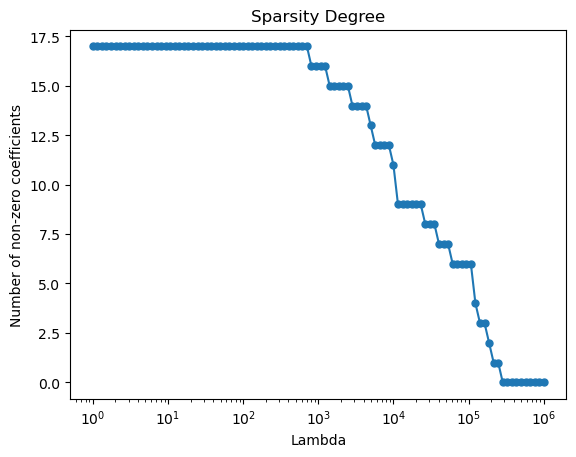

In [13]:
l0_coef_norm = np.zeros(len(lasso_lams),)

for i in range(len(lasso_lams)):
    l0_coef_norm[i] = sum(lasso_coefs[:,i]!=0)


plt.plot(lasso_lams, l0_coef_norm, marker='o', markersize=5)
plt.xlabel('Lambda')
plt.ylabel('Number of non-zero coefficients')
plt.title('Sparsity Degree')
plt.xscale('log')
plt.show()

As we can see from the plot, the more we increase the value of lambda, the more simple hyoptesis we get (i.e. the number of zero values in the parameter increases).
If $\lambda = 10^6$ we are actually considering no feature, that is, all the parameters $w_i = 0$ $\forall i$ => we are not considering any features!

### Use $k$-fold Cross-Validation to fix the regularization parameter

Now, we need to decide which value of $\lambda$ to use. In order to do this, we are going to use $k$-fold Cross-Validation.

We are going to use the scikit-learn built-in routine *Lasso* (from the *linear_model* package) to compute the lasso coefficients.

We use *KFold* from *sklearn.cross_validation* to split the data (i.e. X_train and Y_train) into the desired number of folds.

Then we pick $\lambda_{opt}$ to be the chosen value for the regularization parameter.

When data is not 'plentiful', we cannot afford to use fresh validation set to select efficiently the best hypothesis.

#### $k$-fold Cross-Validation

Given $m$, we partition the training set into $k$ folds of size $m/k$. For each fold:

* 1 - perform the training on the union of the other $(k-1)$ folds;
* 2 - treat the left-out fold as a *small validation set*, and estimate the error of the learned hypothesis.

$\longrightarrow$ The final estimate of the true error will be the average of the estimated errors through all the folds, as described above.

When $k = m$, we refer to the above procedure as *leave-one out* validation.

<u>Often cross validation is used for model selection.</u>

Imortant: <u>At the end, the final hypothesis is obtained from training on the entire training set.</u>

In [14]:
from sklearn.model_selection import KFold

num_folds = 5

kf = KFold(n_splits = num_folds)

loss_lasso_train_kfold = np.zeros(len(lasso_lams),)
loss_lasso_val_kfold = np.zeros(len(lasso_lams),)

err_lasso_train_kfold = np.zeros(len(lasso_lams),)
err_lasso_val_kfold = np.zeros(len(lasso_lams),)


# We use the k-Fold Cross Validatoin for the model selection:
# we want to identify the best value for the lambda parameter.
for i, lam in enumerate(lasso_lams):
    # -- 1) define a lasso model using Lasso() for the i-th value of lam_values
    lasso_kfold = linear_model.Lasso(alpha=lam, tol=0.05)
    
    for train_index, validation_index in kf.split(X_train_scaled):
        X_train_kfold, X_val_kfold = X_train_scaled[train_index], X_train_scaled[validation_index]
        Y_train_kfold, Y_val_kfold =  Y_train[train_index], Y_train[validation_index]
        
        # -- data scaling: standardize features with respect to the current folds
        scaler_kfold = preprocessing.StandardScaler().fit(X_train_kfold)
        X_train_kfold_scaled = scaler_kfold.transform(X_train_kfold)
        X_val_kfold_scaled = scaler_kfold.transform(X_val_kfold)
    
        # -- learn the model using the training data from the k-fold
        lasso_kfold.fit(X_train_kfold_scaled, Y_train_kfold)
        
        # -- compute the loss using the validation data from the k-fold
        Y_pred_train = lasso_kfold.predict(X_train_kfold_scaled)
        Y_pred_val = lasso_kfold.predict(X_val_kfold_scaled)
        
        # -- incremental mean
        loss_lasso_train_kfold[i] += np.linalg.norm(Y_train_kfold - Y_pred_train)** 2 / len(Y_train_kfold)
        loss_lasso_val_kfold[i] += np.linalg.norm(Y_val_kfold - Y_pred_val)** 2 / len(Y_val_kfold)
        err_lasso_train_kfold[i] += (1.0 - lasso_kfold.score(X_train_kfold, Y_train_kfold))
        err_lasso_val_kfold[i] += (1.0 - lasso_kfold.score(X_val_kfold, Y_val_kfold))

# -- compute the mean => estimate of validation losses and errors for each lam
loss_lasso_train_kfold /= num_folds
loss_lasso_val_kfold /= num_folds
err_lasso_train_kfold /= num_folds
err_lasso_val_kfold /= num_folds

# -- choose the regularization parameter that minimizes the loss
lasso_lam_opt = lasso_lams[np.argmin(loss_lasso_val_kfold)]

print('Best value of the regularization parameter (lambda):', lasso_lam_opt)
print('Min loss: ', np.min(loss_lasso_val_kfold))
print('Min (1 - R²) ', np.min(err_lasso_val_kfold))

Best value of the regularization parameter (lambda): 15199.11082952933
Min loss:  64128298144.563866
Min (1 - R²)  0.4444894476939935


Let's plot the Cross-Validation estimates of the loss as a function of the regularization parameter.

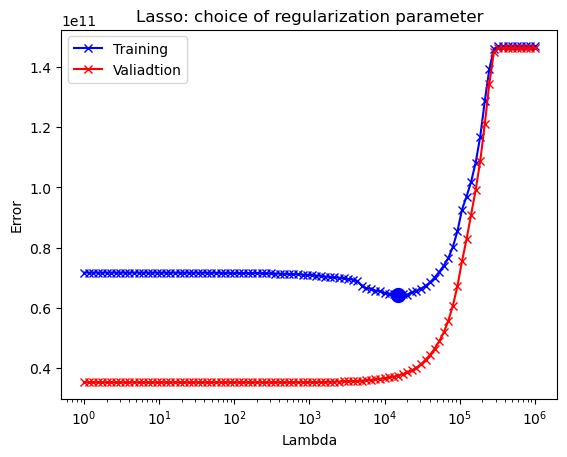

In [15]:
# Plot the model selection curve.
plt.xscale('log')
plt.plot(lasso_lams, loss_lasso_val_kfold, color='b', marker='x', label="Training")
plt.plot(lasso_lams, loss_lasso_train_kfold, color='r', marker='x', label="Valiadtion")
plt.scatter(lasso_lams[np.argmin(loss_lasso_val_kfold)], loss_lasso_val_kfold[np.argmin(loss_lasso_val_kfold)], color='b', marker='o', linewidths=5)
plt.xlabel('Lambda')
plt.ylabel('Error')
plt.title('Lasso: choice of regularization parameter')
plt.legend()
plt.show()

The value of the error on the validation set is constant at the biginning.
At some point we find a better model, that is, the validation error it decreses while the lambda increases. 
In this situation we are considering an hypothesis that is simpler (some weights $w_i = 0$) so less features are considered important for predicting the price.

If we keep increasing the value of lambda => we will reach a point where we consider all the features futile, i.e. all the weights $w_i = 0$.
In this situation the validation error grows exponentially.

So now we have found the best value for the $\lambda$ parameter.
Now that we have fixed the parameter of the algorithm, we can find the hypothesis using the LASSO on the training data.

## Now let's estimate the lasso coefficients using all the training data and the optimal regularization parameter (chosen at previous step)

Note that we use all the training data to learn the final model for the optimal regularization parameter (once we have chosen the parameter, there is no reason to use less data than what we have). We leave out only the test data so that we can later use it to estimate the generalization error.

In [16]:
# -- estimate Lasso coefficients with all data (X_train_scaled) using the the optimal value lasso_lam_opt of the regularization parameter

# -- define the model
lasso_reg = linear_model.Lasso(alpha=lasso_lam_opt)

# -- fit using the training data
lasso_reg.fit(X_train_scaled, Y_train)

# -- average loss on training data
loss_train_lasso = np.linalg.norm(Y_train - lasso_reg.predict(X_train_scaled))**2 / m_train

# -- average loss on validation data
loss_val_lasso = np.linalg.norm(Y_val - lasso_reg.predict(X_val_scaled))**2 / m_val

# -- print average loss in training data and in validation data
print('Average loss in training data:', loss_train_lasso)
print('Average loss in validation data:', loss_val_lasso)

# -- now print (1 - the coefficient of determination) on training and on validation data to get an idea to what the average
# -- loss corresponds to
print('1 -  R² on training data:  ', 1 - lasso_reg.score(X_train_scaled, Y_train))
print('1 -  R² on validation data:', 1 - lasso_reg.score(X_val_scaled, Y_val))

Average loss in training data: 40154413798.32089
Average loss in validation data: 32289491018.77979
1 -  R² on training data:   0.27460355444048834
1 -  R² on validation data: 0.4890289767309042


## We now compare the coefficients from the LR model and the Lasso model

Note that we do not plot the bias (that is not a coefficient of the features)

In [17]:
# -- simil coefficient in sign - but some of them are zeros

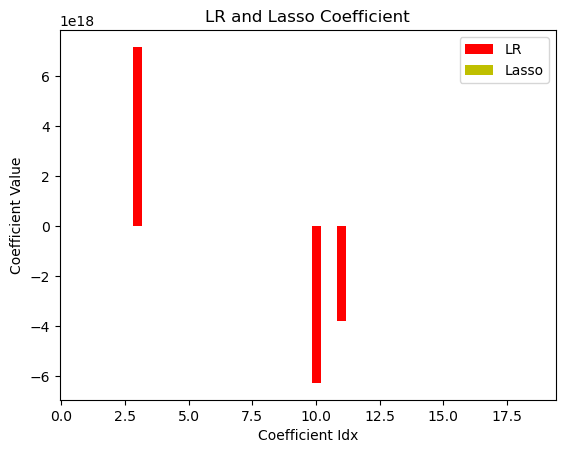

In [18]:
# -- compare LR and lasso coefficients

# -- define the x locations for the groups
ind = np.arange(1, len(LR.coef_) + 1)

# -- define the width of the bars
width = 0.35 

fig, ax = plt.subplots()
rects1 = ax.bar(ind, LR.coef_, width, color='r')
rects2 = ax.bar(ind + width, lasso_reg.coef_, width, color='y')
ax.legend((rects1[0], rects2[0]), ('LR', 'Lasso'))
plt.xlabel('Coefficient Idx')
plt.ylabel('Coefficient Value')
plt.title('LR and Lasso Coefficient')
plt.show()

As we can see the LR model considers all the features (all the weights $w_i \neq 0$).
In the other hand, the lasso has some value $w_i= 0$, so some features are not considered.

## Ridge Regression

### Use Ridge regression with cross-validation

We perform the L2 regularization for different values of the regularization parameter $\alpha$ (called $\lambda$ in class), and use the Scikit-learn function to perform cross-validation (CV).

In Ridge regression for scikit learn, the objective function is:

$$
    ||y - Xw||^2_2 + \alpha * ||w||^2_2
$$

Note: the CV in Scikit-learn is by default a *stratified* CV, that means that data is split into train-validation while maintaining the proportion of different classes in each fold.

In the code below:
- we use RidgeCV() to select the best value of $\alpha$ with a 5-fold CV with L2 penalty;
- we use Ridge() to learn the best model for the best $\alpha$ for ridge regression using the entire training set

Note that RidgeCV() picks some default values of $\alpha$ to try, but we decide to pass the same values used for the Lasso.




In [19]:
# -- let's define the values of alpha to use
ridge_alphas = np.logspace(0, 6, num = 100)

# -- RIDGE REGRESSION HAS THE BUILT IN FUNCTION TO PERFORM CV (Cross Validation)
# -- define the model using RidgeCV passing the vector of alpha values and the cv value (= number of folds)
ridge = linear_model.RidgeCV(alphas = ridge_alphas, cv=5)

# -- fit the model on training data
ridge.fit(X_train_scaled, Y_train)

# -- the attribute 'alpha_' contains the best value of alpha as identified by cross-validation;
# -- let's print it
print('Total number of coefficients:', (len(ridge.coef_)))
print('Number of non-zero coefficients:', (sum(ridge.coef_ != 0)))
print('Best value of parameter lambda according to 5-fold Cross-Validation:', ridge.alpha_)

# -- define the model using the best alpha; note that various solvers are availalbe, choose
# -- an appropriate one (e.g., Singular Value Decomposition)
ridge_final = linear_model.Ridge(alpha = ridge.alpha_ , solver='svd')

# -- fit the model using the best alpha on the entire training set
ridge_final.fit(X_train_scaled, Y_train)

# -- average loss on training data
loss_train_ridge = np.linalg.norm(Y_train - ridge_final.predict(X_train_scaled))**2 / m_train
# -- average loss on validation data
loss_val_ridge = np.linalg.norm(Y_val - ridge_final.predict(X_val_scaled))**2 / m_val

# -- print average loss in training data and in test data
print('Average loss in training data:', loss_train_ridge)
print('Average loss in validation data:', loss_val_ridge)

# -- now print 1 - the coefficient of determination on training and on test data to get an idea to what the average
# -- loss corresponds to
print('1 - R² on training data:  ', 1 - ridge_final.score(X_train_scaled, Y_train))
print('1 - R² on validation data:', 1 - ridge_final.score(X_val_scaled, Y_val))

Total number of coefficients: 18
Number of non-zero coefficients: 18
Best value of parameter lambda according to 5-fold Cross-Validation: 100.0
Average loss in training data: 42788209542.10925
Average loss in validation data: 28076529012.22377
1 - R² on training data:   0.29261526484789435
1 - R² on validation data: 0.4252230623585159


## We now compare the coefficient from the LR model, the lasso model, and the ridge model

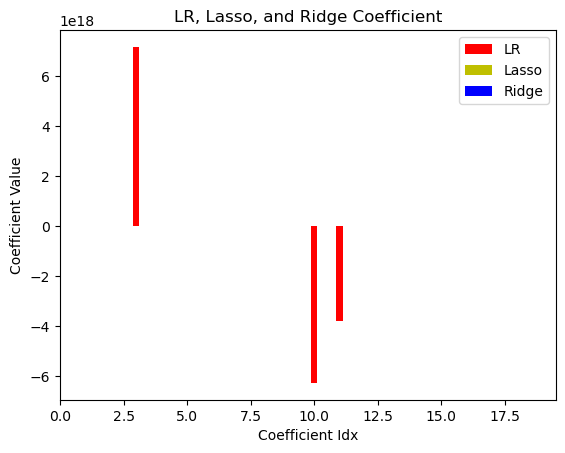

In [20]:
# -- compare LR, lasso coefficients and ridge coefficients

# -- define the x locations for the groups
ind = np.arange(1, len(LR.coef_) + 1)
# -- define the width of the bars
width = 0.25

fig, ax = plt.subplots()
rects1 = ax.bar(ind, LR.coef_, width, color='r')
rects2 = ax.bar(ind + width, lasso_reg.coef_, width, color='y')
rects3 = ax.bar(ind + 2*width, ridge_final.coef_, width, color='b')
ax.legend((rects1[0], rects2[0], rects3[0]), ('LR', 'Lasso', 'Ridge'))
plt.xlabel('Coefficient Idx')
plt.ylabel('Coefficient Value')
plt.title('LR, Lasso, and Ridge Coefficient')
plt.show()

## Now use all data but the test one to learn the best model (using the chosen model class and parameter, if any), and estimate its generalization error on the test data

In [21]:
# -- train all models on both the training and validation sets!

In [22]:
# LR -- compute best LR model on training and validation data
LR = linear_model.LinearRegression()
LR.fit(X_train_and_val_scaled, Y_train_and_val)
# -- compute and print 1 - coefficient of determination for the best LR model
print("1 -  R² of LR on test data:   ", 1 - LR.score(X_test_scaled, Y_test))


# LASSO -- compute best lasso_reg model on training and validation data
lasso_reg = linear_model.Lasso(alpha=lasso_lam_opt)
lasso_reg.fit(X_train_and_val_scaled, Y_train_and_val)
# -- compute and print 1 - coefficient of determination for the best lasso model
print("1 -  R² of lasso on test data:", 1 - lasso_reg.score(X_test_scaled, Y_test))


# RIDGE -- compute best ridge model on training and validation data
ridge_final = linear_model.Ridge(alpha = ridge.alpha_ , solver='svd')
ridge_final.fit(X_train_and_val_scaled, Y_train_and_val)
# -- compute and print 1 - coefficient of determination for the best ridge model
print("1 -  R² of ridge on test data:", 1 - ridge_final.score(X_test_scaled, Y_test))

1 -  R² of LR on test data:    0.32447455052788776
1 -  R² of lasso on test data: 0.2333587487770934
1 -  R² of ridge on test data: 0.2504665396289423


We get better results because we have used more data for the training.

## Now we use other data (from the future!) to see which model really works well

In [23]:
# -- load the new data
df = pd.read_csv('kc_house_data/kc_house_data_future.csv', sep = ',')

# -- remove the data samples with missing values (NaN)
df = df.dropna() 

df.describe()

data = df.values

m_future = data.shape[0]
print('Number of samples', m_future)

X_future = data[:m_future,3:]
Y_future = data[:m_future,2]

# -- let's scale the new data with the scaler used at the beginning!
X_future_scaled = scaler.transform(X_future)

# -- compute and print 1 - coefficient of determination for the best LR model
print('1 - R² of LR on future data:   ', 1 - LR.score(X_future_scaled, Y_future))

# -- compute and print 1 - coefficient of determination for the best lasso model
print('1 - R² of lasso on future data:', 1 - lasso_reg.score(X_future_scaled, Y_future))

# -- compute and print 1 - coefficient of determination for the best ridge model
print('1 - R² of ridge on future data:', 1 - ridge_final.score(X_future_scaled, Y_future))

Number of samples 2864
1 - R² of LR on future data:    0.3316928869710185
1 - R² of lasso on future data: 0.3391230955798672
1 - R² of ridge on future data: 0.33958475595237125


**We have obtained almost equivalent performances. Why?**